# Heart Disease Proposal

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*

**Background**

- Heart disease is a variety of conditions that effect the heart.

**Question**

- Is there a certain target audience (determined by sex, age, habits, and medical history) at risk for heart disease? 

**Dataset**

- The dataset contains patient chart data provided by physicians from 4 different cardiovascular clinics around the world. Our project will focus on the data from Cleveland, USA and these are the predictor variables we will use:
 
    
    - `age`
    - `sex`
    - `trestbps` Resting blood pressure (mm Hg)
    - `chol` Serum cholestrol (mg/dL)
    - `fbs` Fasting blood sugar > 120 mg/dL (1 = true; 0 = false)
    - `restecg` Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 3 = showing probable/definite left ventricular hypertrophy)  
    - `thalach` Maximum heart rate achieved   
    - `exang` Exercise induced angina (1 = yes; 0 = no)
    - `oldpeak` ST depression induced by exercise relative to rest  
    - `ca` Number of major vessels (0-3) colored by flourosopy  
    - `cp` Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
    - `slope` Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)  
    - `thal` (3 = normal, 6 = fixed defect, 7 = reversible defect) 

- Target variable:
    - `num` Diagnose of heart disease (Presence (values 1,2,3,4) from absence (value 0).

Original Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Preliminary exploratory data analysis

**Loading R libraries**

In [34]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows
options(repr.plot.width=10, repr.plot.height=10)

**Reading Data**

In [17]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering Missing Values** 

We can see that only the ca and thal columns are in `chr`, while every other column is in numeric data type `dbl`. This indicates that only ca and thal have missing value since we know that the missing value are represented by "?" in this dataset. We can then filter the "?" out of these two columns, and use the `drop_na()` function to drop rows with missing values in a data frame.

In [18]:
filtered_data <- cleveland_data |>
filter(ca != "?", thal != "?")|>
drop_na()

filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


There are 303 rows from the original data set. We can see from the tibble size that after we filter out the `?`, it now become 297 rows.

**Mutating Data**

Next, because the factors 1,2,3 and 4 in the "num" column all indicate the presence of heart disease in a patient, we mutate and combine them into a single variable for convenience. We are also mutating the `num` column to factor because it is our target variable.

In [19]:
mutate_data <- filtered_data |>
mutate(num = ifelse(num == 0, 0, 1)) |>
mutate(num = as_factor(num))

mutate_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Changing the column data type**

After clearing missing values, we mutate the `ca` and `thal` columns from character to numeric.

In [5]:
final_data <- mutate_data |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

final_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


**Splitting the data into training and testing data by 75% and 25% respectfully**

In [6]:
heart_split <- initial_split(final_data, prop = 0.75, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

heart_train
heart_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,1,4,140,187,0,2,144,1,4.0,1,2,7,1
41,1,2,120,157,0,0,182,0,0.0,1,0,3,0
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


**Summarizing the training data**

Distribution of each categorical predictor variables. `See the intro for information about the numerical value.`

In [28]:
count_sex <- heart_train|>
    group_by(sex)|>
    summarize(sex_count = n())

count_fbs <- heart_train|>
    group_by(fbs)|>
    summarize(fbs_count = n())

count_restecg <- heart_train|>
    group_by(restecg)|>
    summarize(restecg_count = n())

count_exang <- heart_train|>
    group_by(exang)|>
    summarize(exang_count = n())

count_slope <- heart_train|>
    group_by(slope)|>
    summarize(slope_count = n())

count_ca <- heart_train|>
    group_by(ca)|>
    summarize(ca_count = n())

count_thal <- heart_train|>
    group_by(thal)|>
    summarize(thal_count = n())

count_cp <- heart_train|>
    group_by(cp)|>
    summarize(cp_count = n())

count_sex
count_fbs
count_restecg
count_exang
count_slope
count_ca
count_thal
count_cp

sex,sex_count
<dbl>,<int>
0,68
1,154


fbs,fbs_count
<dbl>,<int>
0,188
1,34


restecg,restecg_count
<dbl>,<int>
0,108
1,2
2,112


exang,exang_count
<dbl>,<int>
0,150
1,72


slope,slope_count
<dbl>,<int>
1,101
2,102
3,19


ca,ca_count
<dbl>,<int>
0,134
1,49
2,24
3,15


thal,thal_count
<dbl>,<int>
3,122
6,12
7,88


cp,cp_count
<dbl>,<int>
1,19
2,39
3,62
4,102


In [65]:
type_vs_cp <- count_cp |>
    ggplot(aes(x = cp, y = cp_count)) +
    geom_bar(stat = "identity") +
    labs(x = "Chest Pain Type",y = "Count for types", color = "Heart Disease") +
    theme(text = element_text(size = 20)) +
    ggtitle("Chest Pain Type vs Count for Types")

type_vs_thal <- count_thal |>
    ggplot(aes(x = thal, y = thal_count)) +
    geom_bar(stat = "identity") +
    labs(x = "Number of major vessels colored with fluoroscopy",y = "Count for type", color = "Heart Disease") +
    theme(text = element_text(size = 20)) +
    ggtitle("Number of Major Blood Vessels Colored with Fluoroscopy")

plot_grid(type_vs_cp, type_vs_thal, ncol = 1)

ERROR: Error in plot_grid(type_vs_cp, type_vs_thal, ncol = 1): could not find function "plot_grid"


We can see from the data and two example visualization above that most of the categorical predictor variables are not evenly distributed in the data set. What we can do in the future is use the `up_sampling()` function from `library(themis)` in our classification recipe to balance the distribution of different types.

**Mean of the numerical predictor values**

In [8]:
mean_data <- heart_train|>
    select(age,trestbps,chol,thalach,oldpeak)|>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
mean_data

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.94144,132.7027,248.8829,149.4459,1.072973


*Overlaying distribution of the predictor variables*

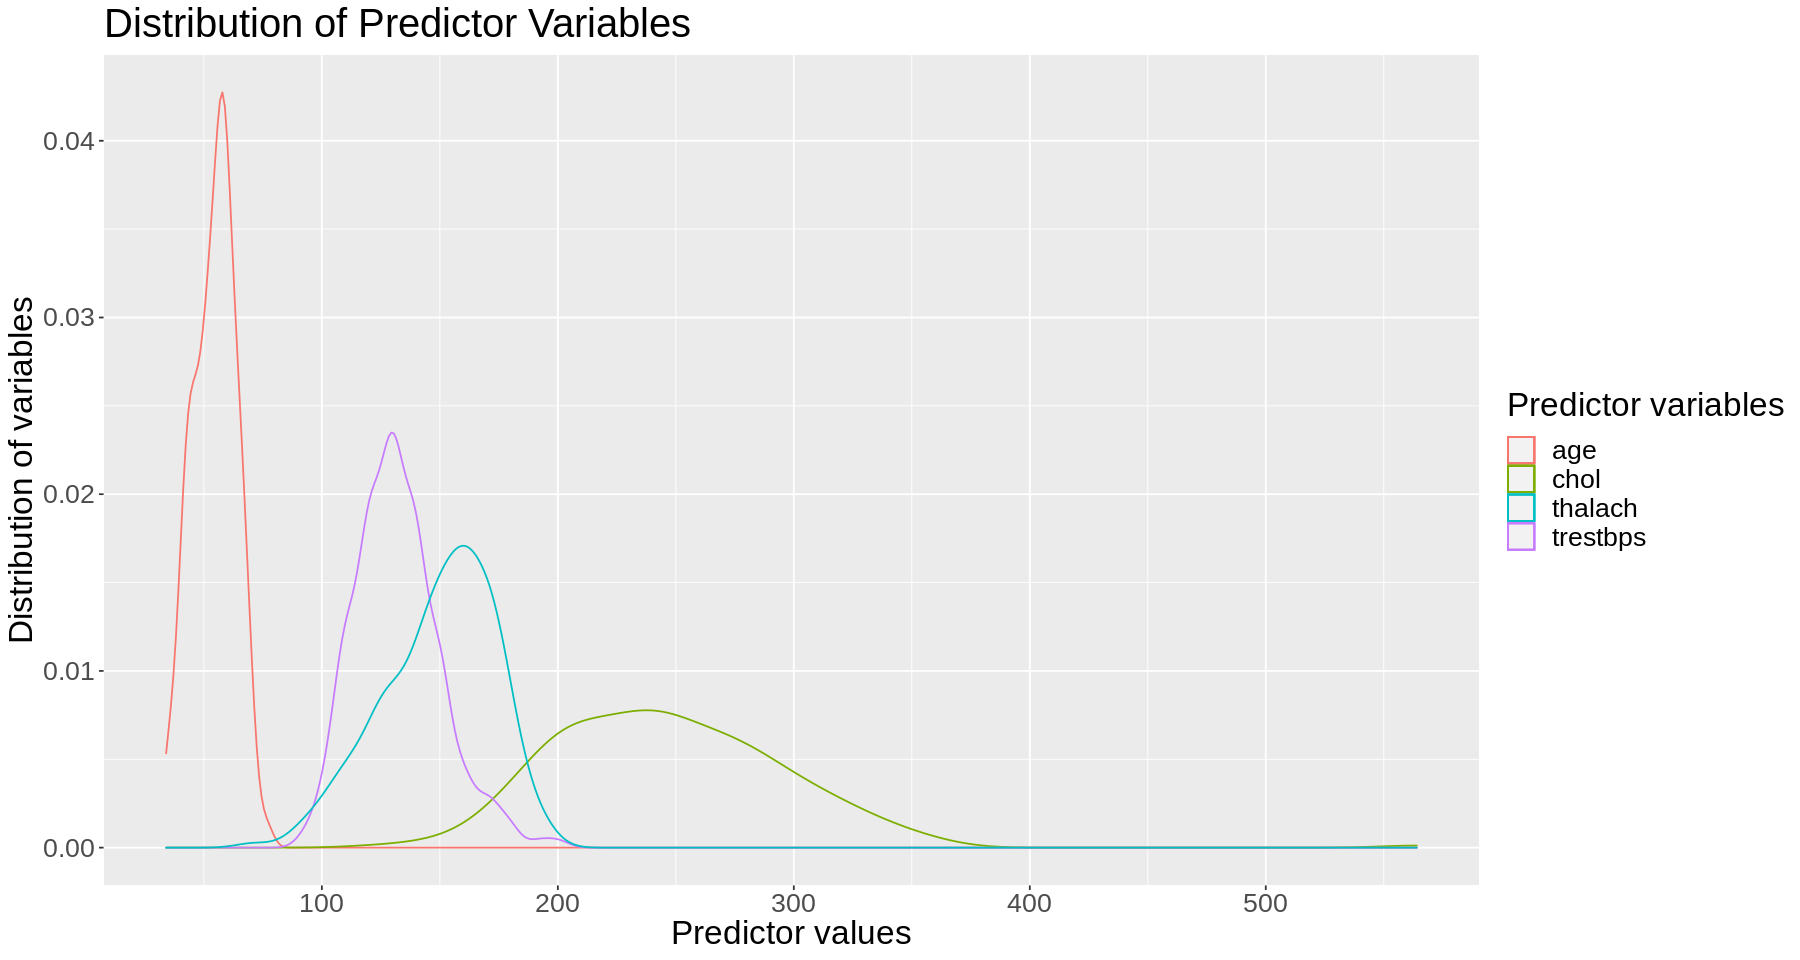

In [64]:
ggplot(heart_train) + 
    geom_density(aes(x=age, color = 'age')) +
    geom_density(aes(x=chol, color = 'chol')) +
    geom_density(aes(x=trestbps, color = 'trestbps')) +
    geom_density(aes(x=thalach, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of Predictor Variables")

Observation we can make through the graph and the mean values for our numerical predictor is that they are connected. The mean value for age is around 55 and we can see from the graph that most people are distributed around 50-60 ish and it is the same for all other variables in the graph. (graph didn't include `oldpeak` since it's around 1, will cause scale problems)

**Discover the distribution of heart disease**

In [9]:
counting_types <- heart_train |>
    group_by(num)|>
    summarize(types_count = n()) 
counting_types

num,types_count
<fct>,<int>
0,120
1,102


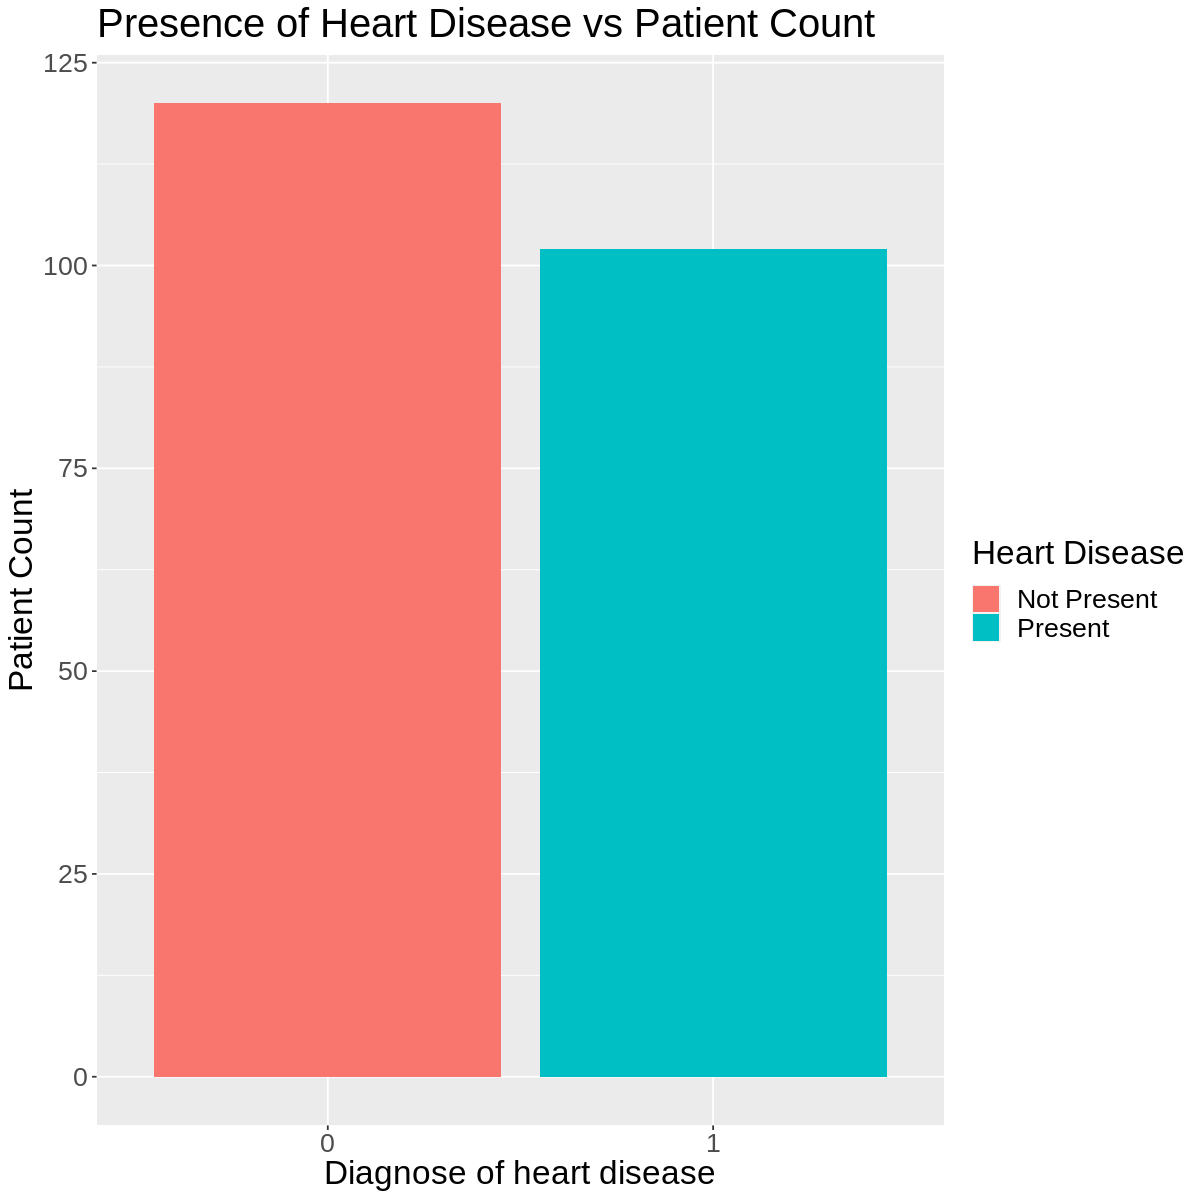

In [10]:
type_vs_num <- counting_types |>
    ggplot(aes(x = num, y = types_count, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "Diagnose of heart disease",y = "Patient Count", color = "Heart Disease") +
    ggtitle("Presence of Heart Disease vs Patient Count") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
type_vs_num

We can see from the graph that the distribution of heart disease is even which is really good! 

**Exploring the relationship between predictor variables**

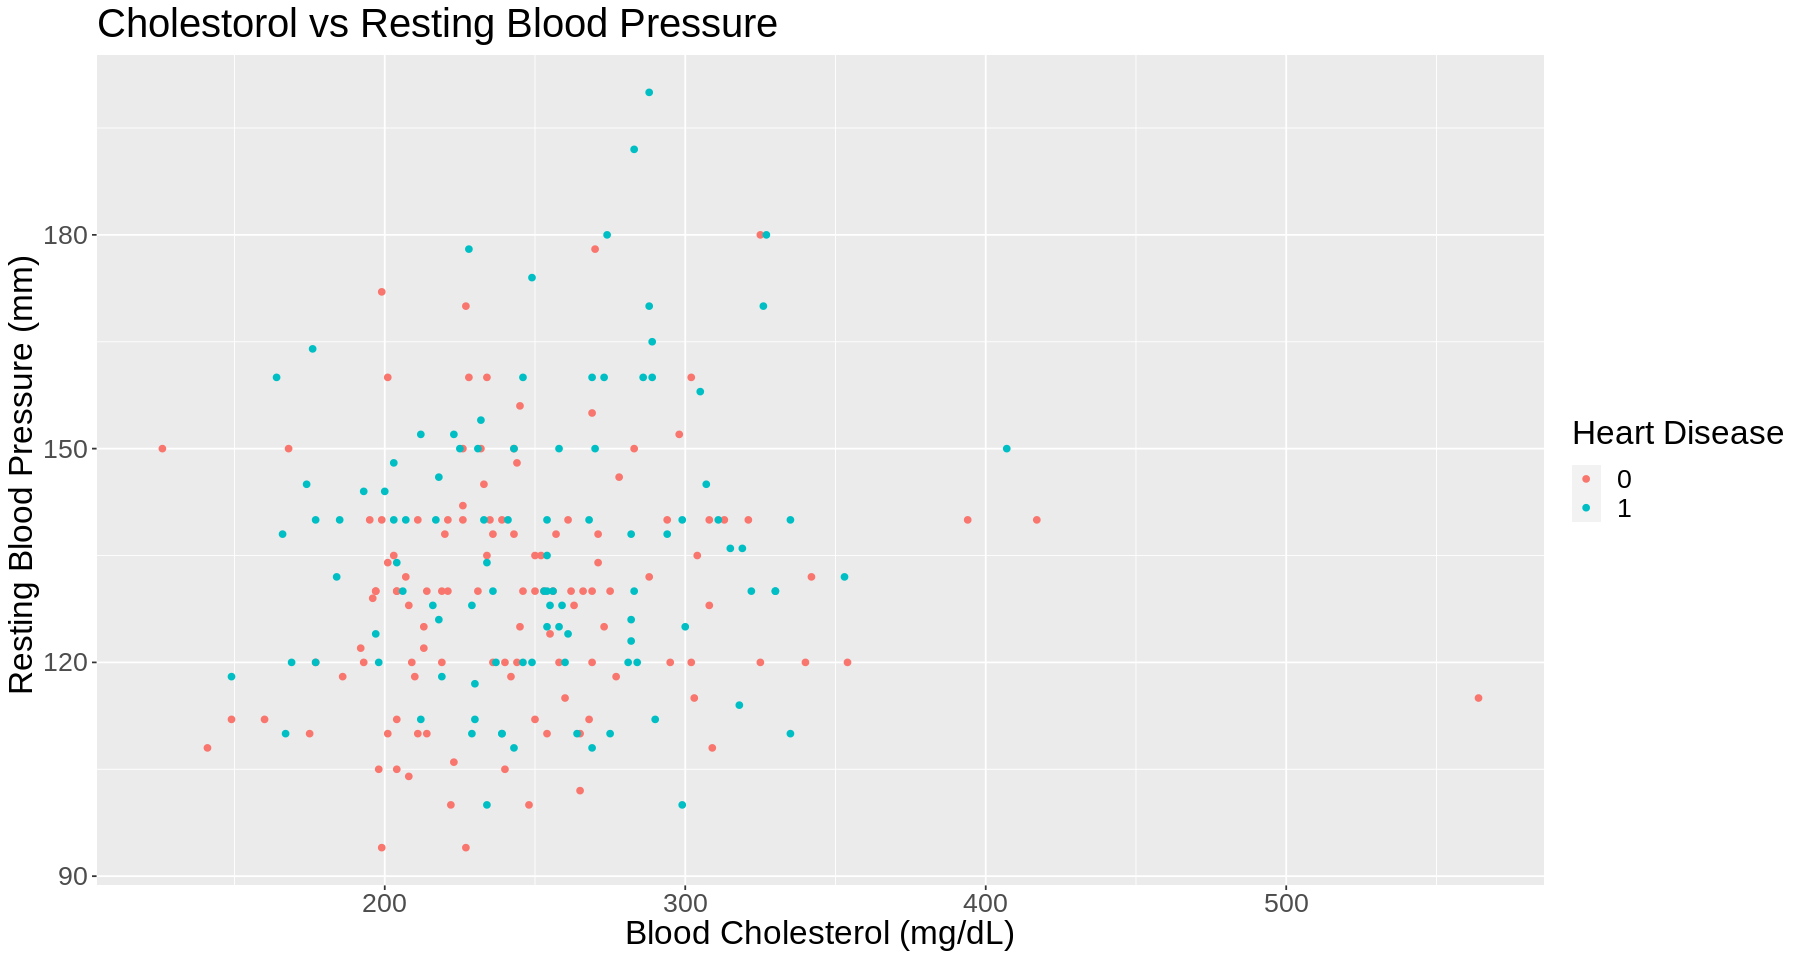

In [11]:
options(repr.plot.width = 15, repr.plot.height = 8) 

trestbps_vs_chol <- heart_train |>
    ggplot(aes(x = chol , y = trestbps, color = num))+
    geom_point()+
    labs(x = "Blood Cholesterol (mg/dL)", y = "Resting Blood Pressure (mm) ", color = "Heart Disease", labels = c("Not Present", "Present")) +
    ggtitle("Cholestorol vs Resting Blood Pressure")+
    theme(text = element_text(size = 20))
trestbps_vs_chol

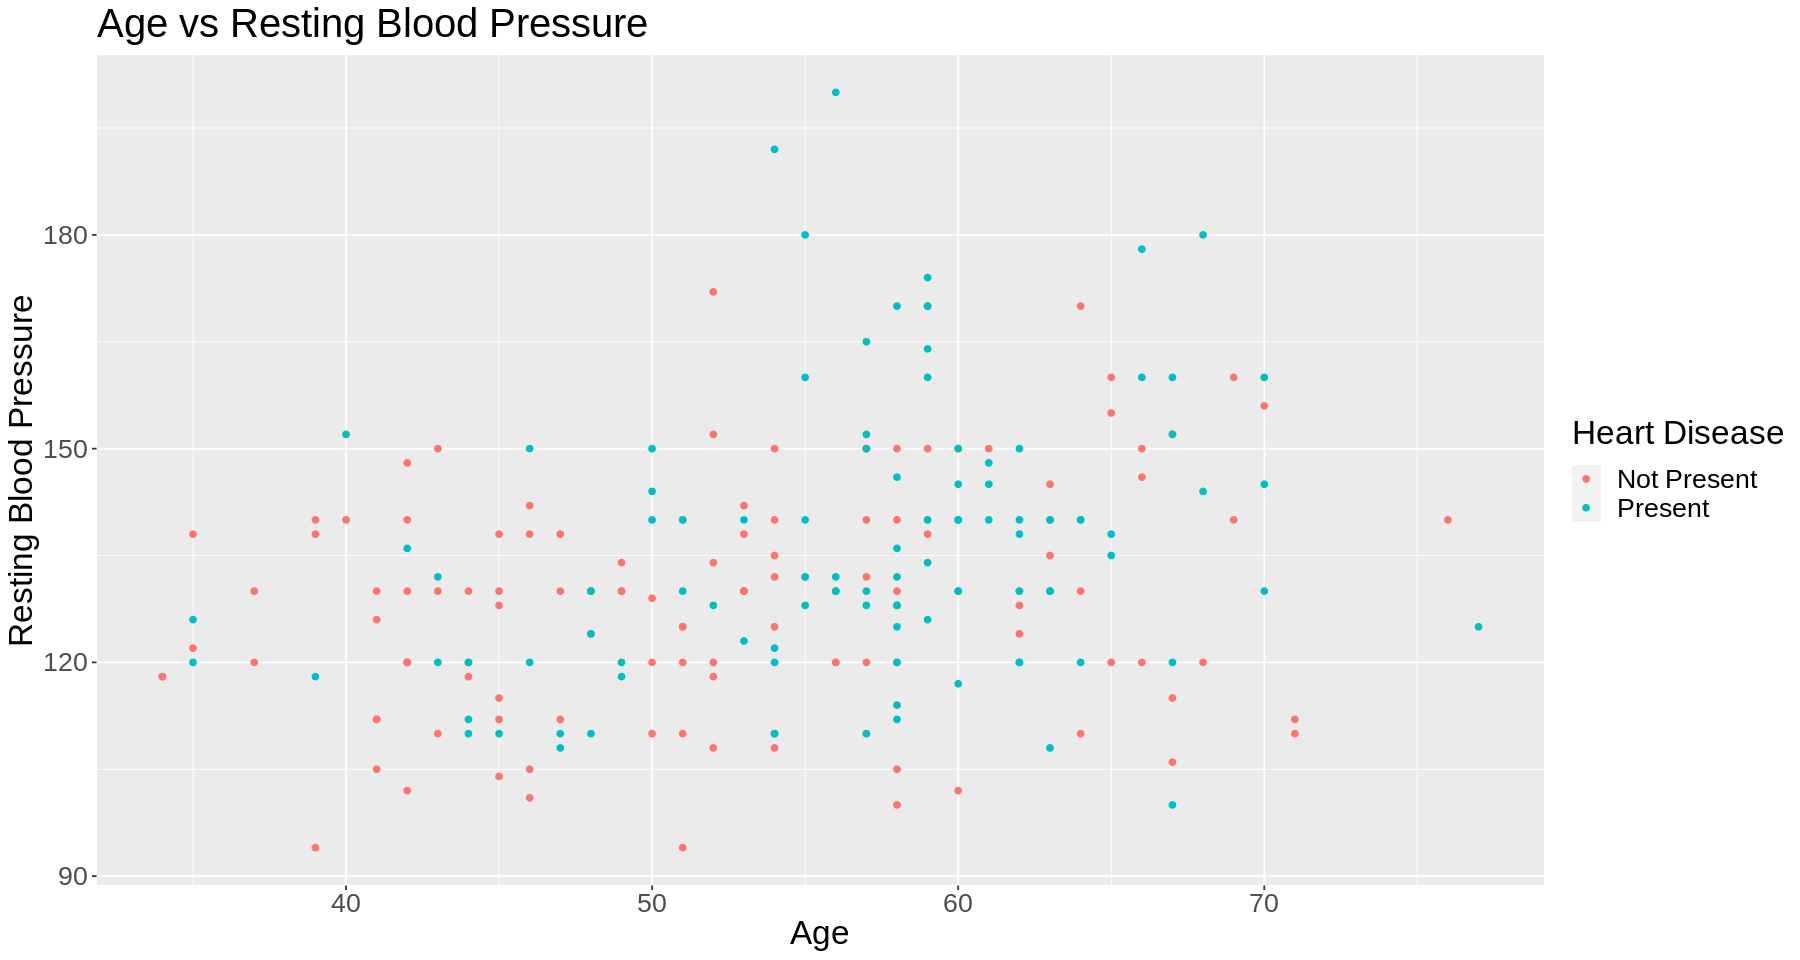

In [58]:
trestbps_vs_age <- heart_train |>
    ggplot(aes(x = age , y = trestbps, color = num)) +
    geom_point() +
    labs(x = "Age", y = "Resting Blood Pressure", color = "Heart Disease") +
    scale_color_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    ggtitle("Age vs Resting Blood Pressure") +
    theme(text = element_text(size = 20))
trestbps_vs_age

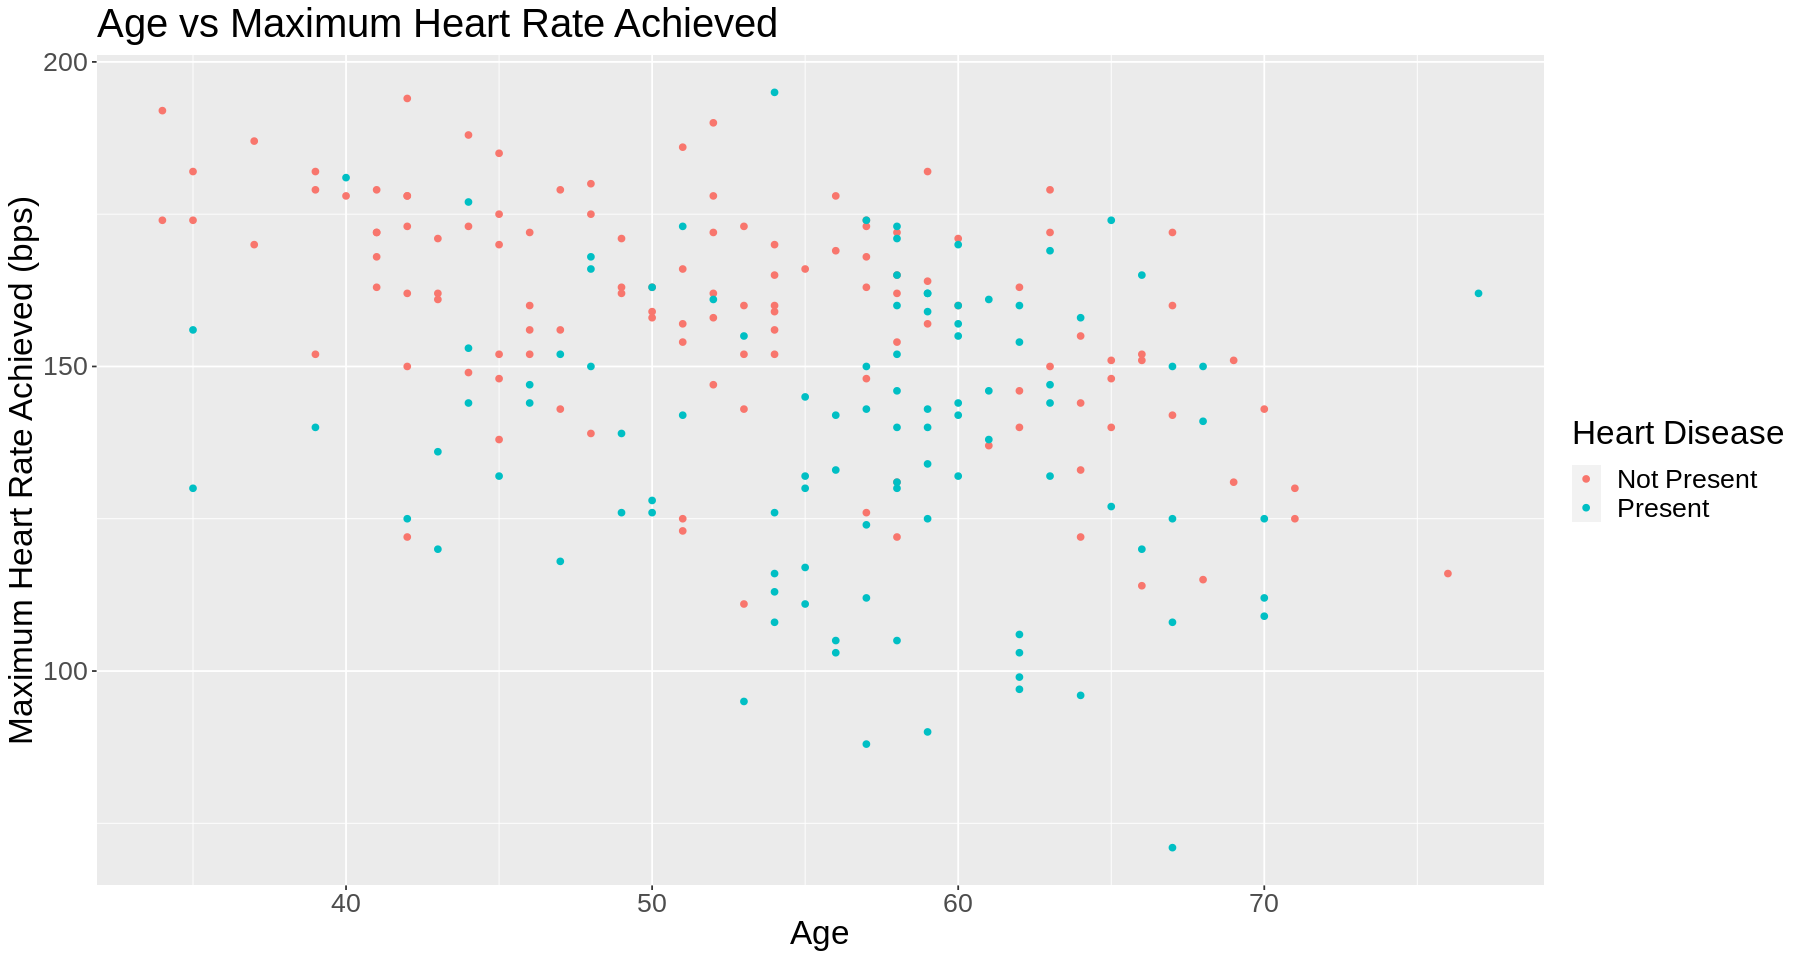

In [59]:
age_vs_thalach <- heart_train |>
    ggplot(aes(x = age , y = thalach, color = num)) +
    geom_point()+
    labs(x = "Age", y = "Maximum Heart Rate Achieved (bps)", color = "Heart Disease") +
    scale_color_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    ggtitle("Age vs Maximum Heart Rate Achieved") +
    theme(text = element_text(size = 20))
age_vs_thalach

Here, we visualize the distribution of chest pain types of males vs females.

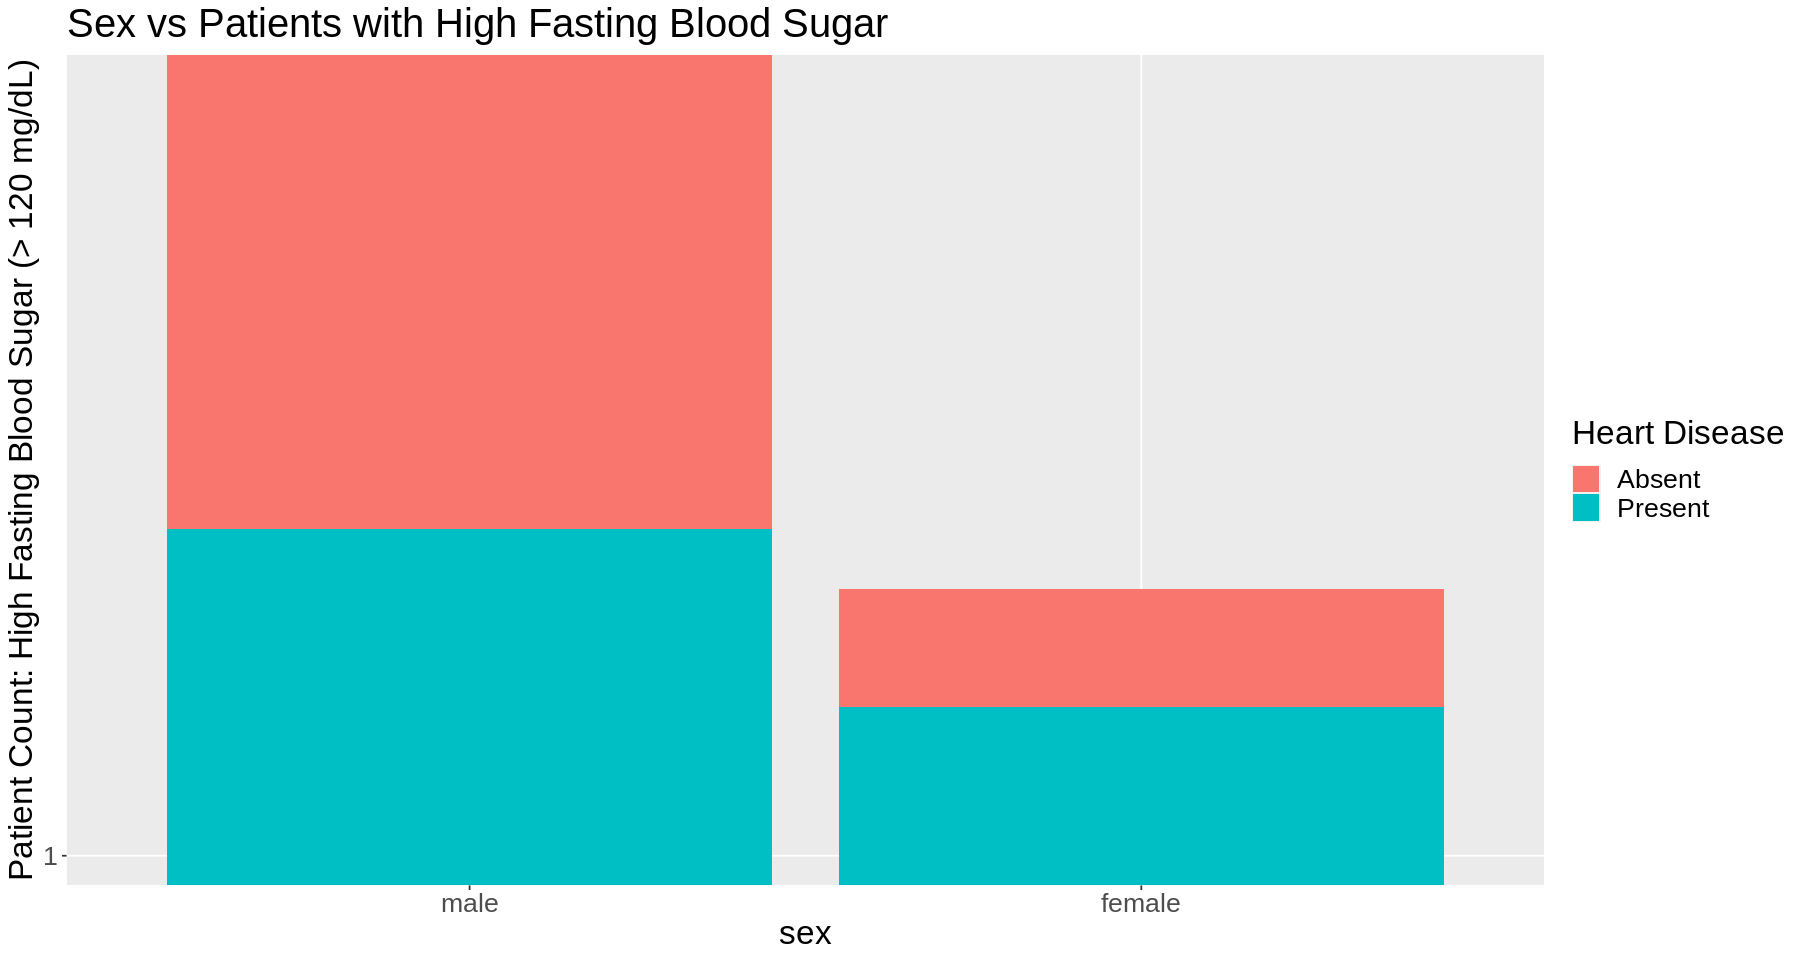

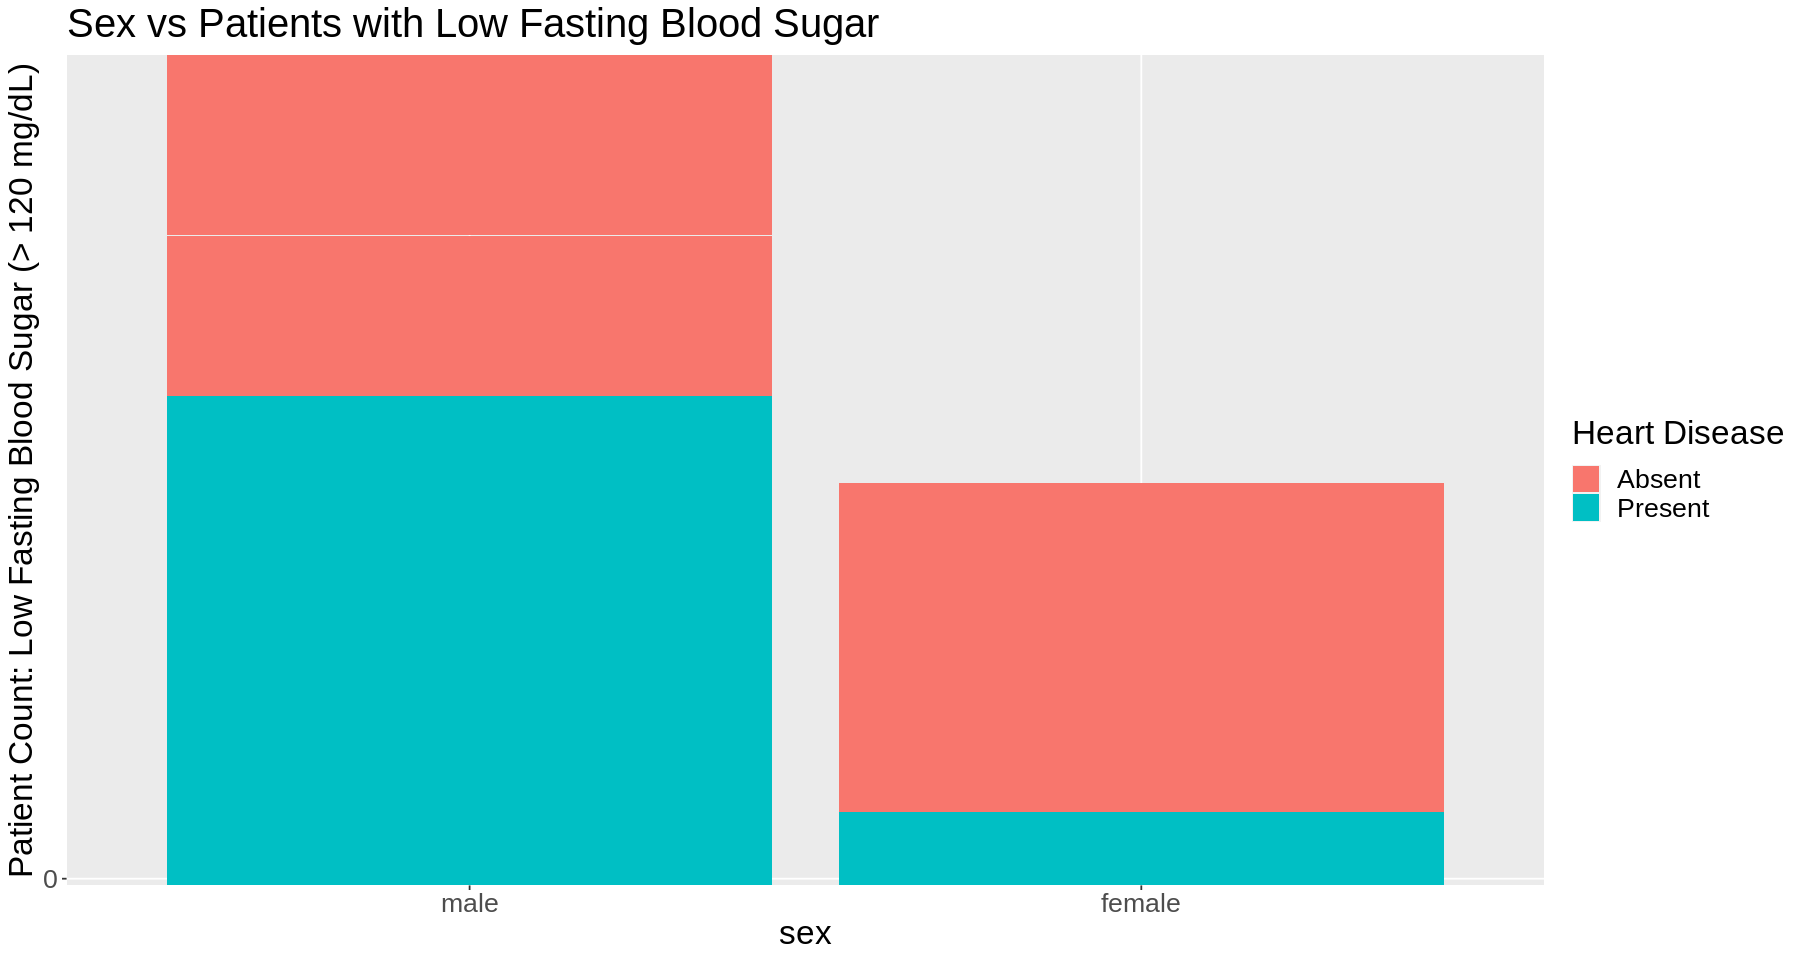

In [53]:
sex_vs_fbs_true  <- heart_train |>
    filter(fbs == 1) |>
    mutate(fbs = as.factor(fbs)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Patient Count: High Fasting Blood Sugar (> 120 mg/dL)", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Sex vs Patients with High Fasting Blood Sugar") +
    theme(text = element_text(size = 20))
sex_vs_fbs_true
sex_vs_fbs_false  <- heart_train |>
    filter(fbs == 0) |>
    mutate(fbs = as.factor(fbs)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Patient Count: Low Fasting Blood Sugar (> 120 mg/dL)", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Sex vs Patients with Low Fasting Blood Sugar") +
    theme(text = element_text(size = 20))
sex_vs_fbs_false

## Methods

**Explain how you will conduct either your data analysis and which variables/columns you will use -> predictors, using classification, validation in the end**
- Our project question asks us to identify whether there is a certain target audience/identity associated with the diagnosis of heart disease. To do this, we will check for the relationship between each variable and the diagnosis of heart disease as a class. We will then use the variables with a positive relationship as predictor variables. Eventually, we will build an identity or predicted audience strongly associated with heart disease diagnosis. The line and bar chart graphs will allow us to visualize the distribution of the predictor value in relation to our target variable, displaying whether a significant or strong relation exists between the two variables 

## Expected outcomes and significance

**Expected Outcomes**
- Our team predicts that heart risk disease will mainly attract an audience of older age and previous chest pain experiences. Additionally, we have seen through previous literature reviews, that there is a correlation between males and increased chest pain compared to females. We also predict that smokers will be more susceptible to heart risk disease whereas non-smokers will be more likely to be asymptomatic. However, our team will conduct more background research to solidify our prediction.

**Impacts**
- The reasoning behind this project is to ensure the general public is aware of certain life factors they may have that are making them more susceptible to heart disease. This could lead to folks putting in place preventive measures and taking care of themselves in specific ways to prevent the specific chest pain that their identity correlates to. The purpose of these findings is to create awareness around heart disease risk and to push others toward regular checkups and monitoring. 

**Future Implications**
- These findings could lead to follow-up questions that inquire and try to find the reasoning behind why heart disease is more susceptible to a specific identity. These findings could also push others to question what other external factors not considered in this project could influence the risk of heart disease.
